<h1 align="center">Volume 4: Shooting Methods.</h1>

    Samuel Goldrup
    002
    9 February 2023

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib 
matplotlib.use('nbAgg')
from matplotlib import pyplot as plt
from scipy.optimize import newton

In [2]:
def secant_method(h, s0, s1, max_iter=100, tol=1e-8):
    """
    Finds a root of h(s)=0 using the secant method with the
    initial guesses s0, s1.
    """
    for i in range(max_iter):
        # Get the residuals
        h0 = h(s0)
        h1 = h(s1)
        # Update
        s2 = s1 - h1 * (s1 - s0)/(h1 - h0)
        s0, s1 = s1, s2
        
        # Check convergence
        if abs(h1) < tol:
            return s2
    
    print("Secant method did not converge")
    return s2

# Problem 1

Appropriately defined initial value problems will usually have a unique solution.
Boundary value problems are not so straightforward; they may have no solution or they may have several, and you may have to determine which solutions are physically interesting.

Use the secant method to solve the following BVP:
\begin{equation*}
\begin{split}
y'' &= -e^{y-1}, \quad x \in [0,1],\\
y(0) &=y(1) =1.
\end{split}
\end{equation*}
This BVP has two solutions.
Using the secant method, find both numerical solutions and their initial slopes.
What initial values $s_0, s_1$ did you use to find them?

<IPython.core.display.Javascript object>


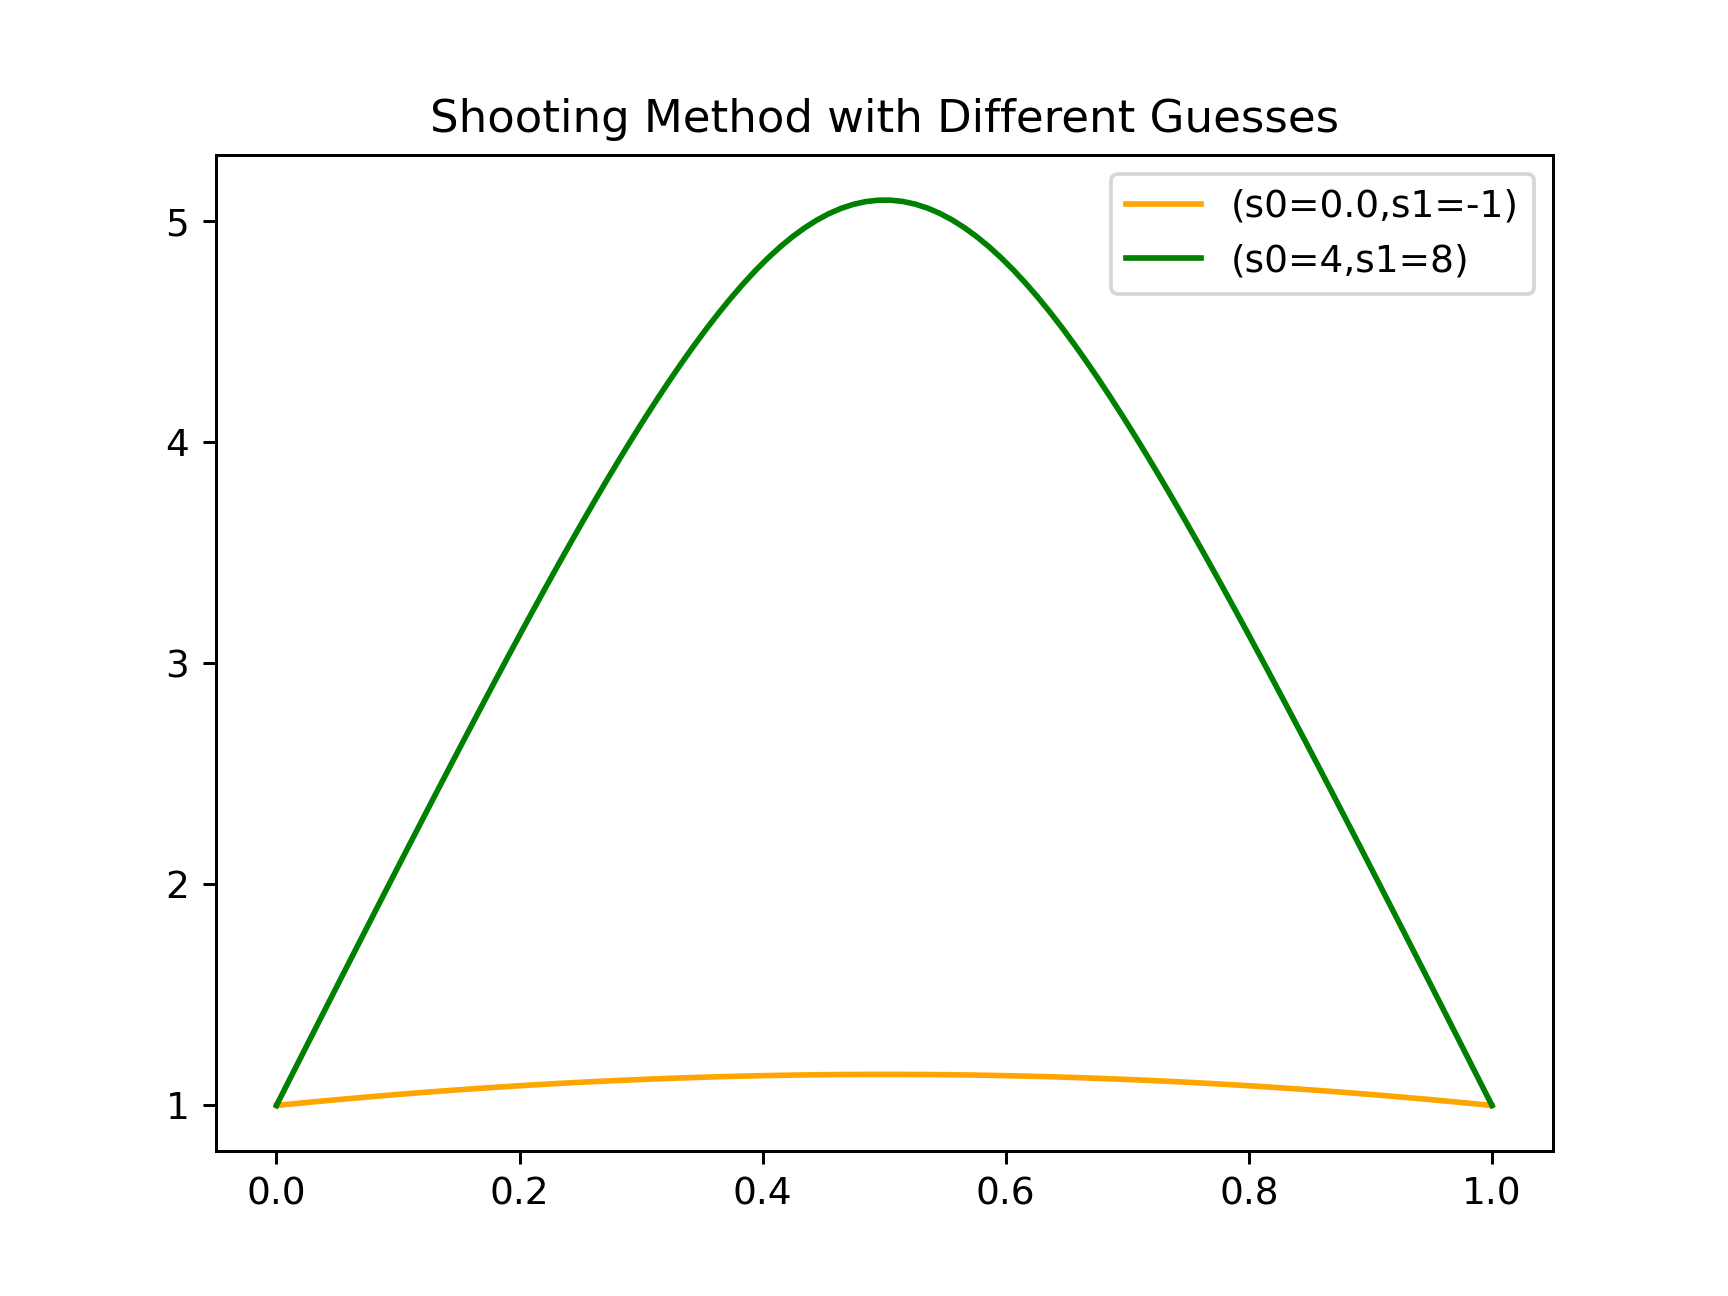

In [3]:
def ode(x,y):
    return np.array([y[1],-np.exp(y[0]-1)])

a = 0
b = 1
alpha,beta = 1,1

def resid(s):
    sol = solve_ivp(ode,(a,b),[alpha,s])
    yb = sol.y[0,-1]    
    return yb - beta

s01 = (beta-alpha)/2
s11 = -1

s02 = 4
s12 = 8

s1 = secant_method(resid,s01,s11)
s2 = secant_method(resid,s02,s12)

x = np.linspace(a,b,100)

y1 = solve_ivp(ode,(a,b),(alpha,s1),t_eval=x).y[0]
y2 = solve_ivp(ode,(a,b),(alpha,s2),t_eval=x).y[0]

plt.plot(x,y1,color='orange',label=f"(s0={s01},s1={s11})")
plt.plot(x,y2,color='green',label=f"(s0={s02},s1={s12})")
plt.title("Shooting Method with Different Guesses")
plt.legend()
plt.show()

# Problem 2

Use Newton's method to solve the BVP
\begin{align*}
y'' &= 3 + \frac{2y}{x^2}, \,\, x \in [1,e],\\
y(1) &= 6, \\
y(e) &= e^2 + 6/e
\end{align*}
Plot your solution.

<IPython.core.display.Javascript object>


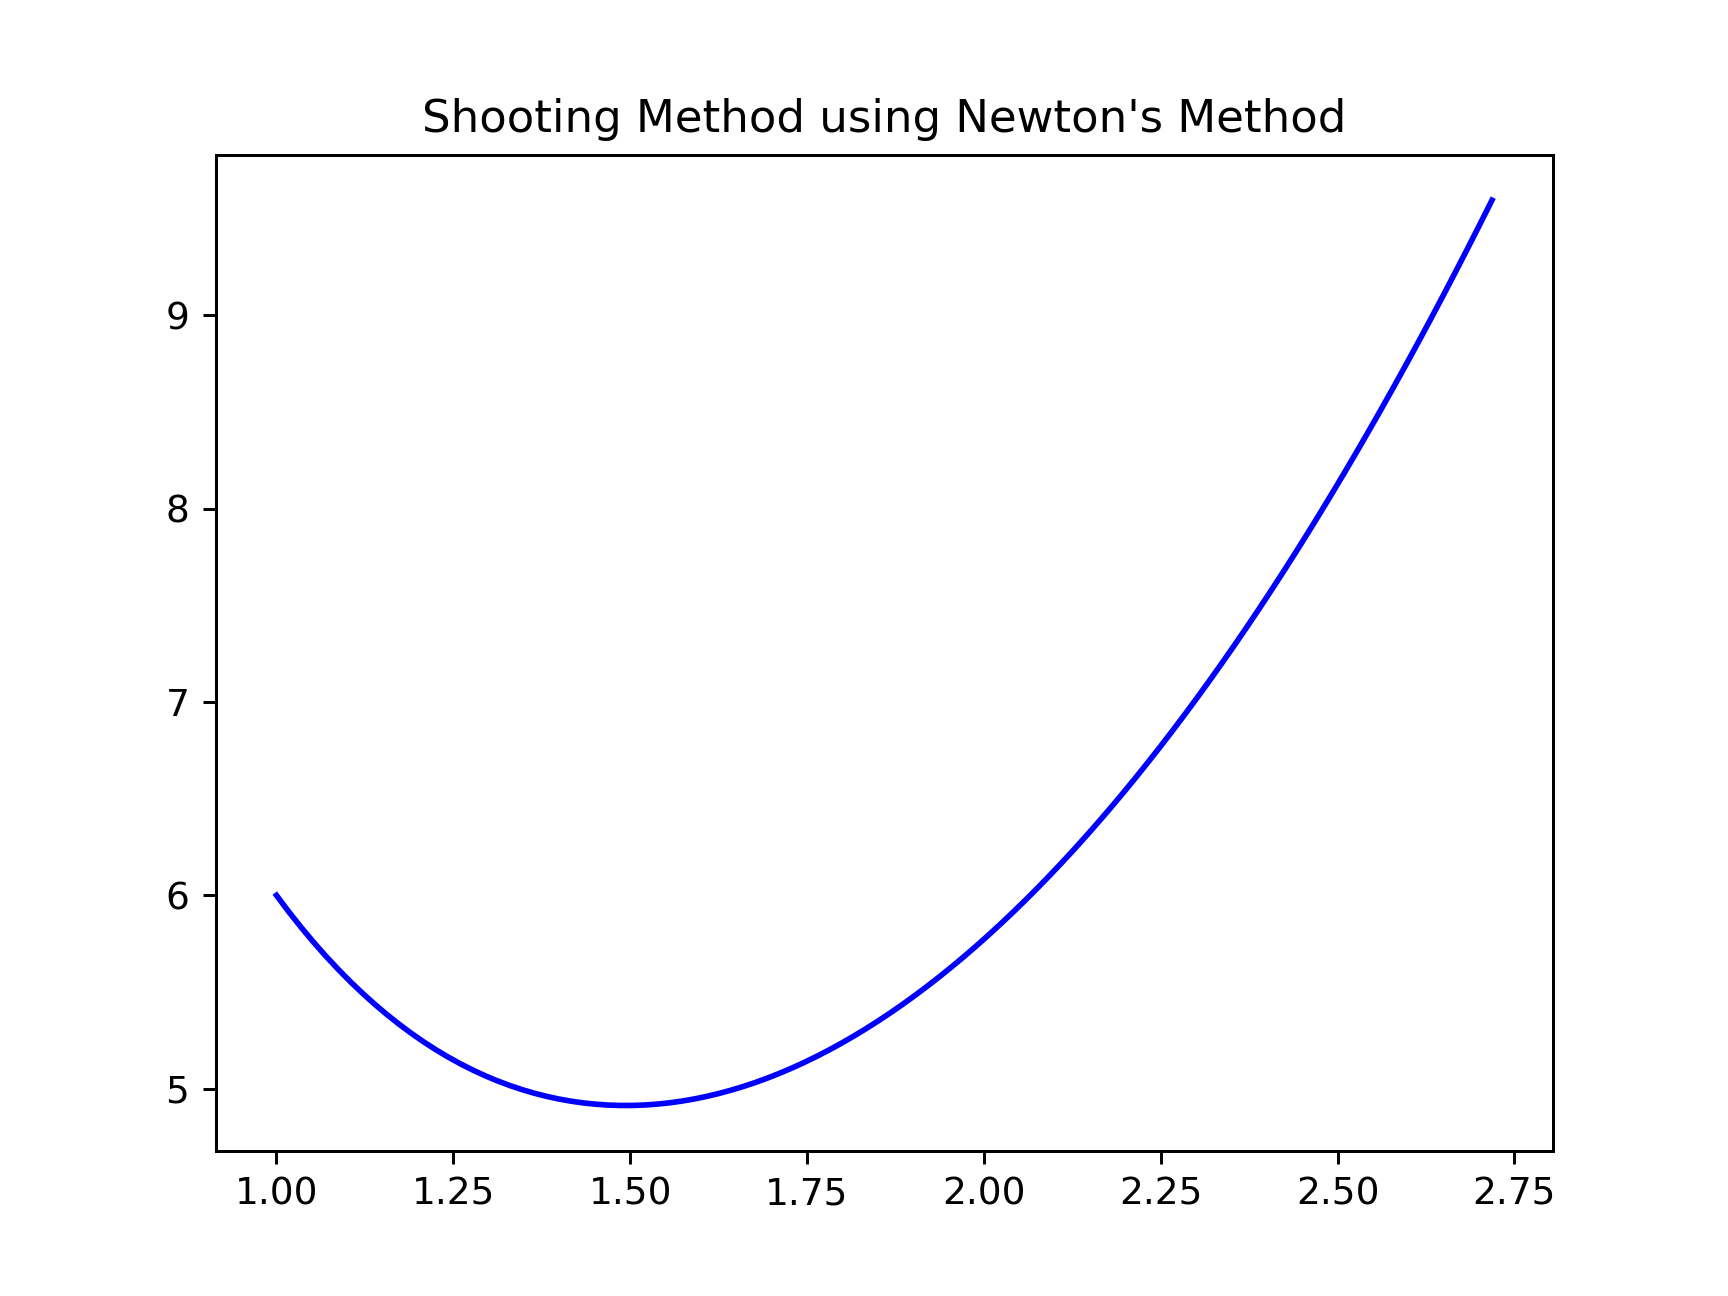

In [4]:
def ode(x,y):
    return np.array([y[1],3+2*y[0]/(x**2)])

a,b = 1, np.exp(1)
alpha, beta = 6, np.exp(2) + 6/np.exp(1)

def resid(s):
    sol = solve_ivp(ode,(a,b),[alpha,s])
    yb = sol.y[0,-1]    
    return yb - beta

#solve the ODE for ys until a convergence tolerance 
# is reached at the end point
def newton(s0,max_iter=100,tol=1e-8):
    for i in range(max_iter):
        s1 = s0 - resid(s0) / denom(s0)  
        if abs(s1-s0) < tol:
            return s1
        s0 = s1
    
def gen_ys(x,y): #this is y_s that we solve several times
    return np.array([y[1],(2/(x**2))*y[0]])

#solve the ode over and over to calculate the derivative w.r.t. s
#aka z(b,s_n)
def denom(s): 
    sol = solve_ivp(gen_ys,(a,b),[0,1])
    yb = sol.y[0,-1]
    return yb

init_guess = 2
s = newton(init_guess)
x = np.linspace(a,b,100)
y = solve_ivp(ode,(a,b),(alpha,s),t_eval=x).y[0]

plt.plot(x,y,color="blue")
plt.title("Shooting Method using Newton's Method")
plt.show()

# Problem 3

Suppose we have a cannon that fires a projectile at a velocity of $45\text{ m/s}$, and the projectile has a mass of about $60$ kg, so that $\mu = .0003$.
At what angle $\theta(0)$ should it be fired to land at a distance of $195\text{ m}$?
Use the secant method to find initial values for $\theta$ that give solutions to the following BVP:
\begin{align}
	\begin{split}
\frac{dy}{dx} &= \tan {\theta} ,\\
\frac{dv}{dx} &= -\frac{g \sin{\theta} + \mu v^2}{v \cos{\theta}},\\
\frac{d\theta}{dx} &= -\frac{g}{v^2},\\
y(0)&= y(195) = 0,\\
v(0) &= 45 \text{ m/s}
	\end{split}
\end{align}
($g = 9.8067\text{ m/s}^2$.)

There are four initial angles $\theta(0)$ that produce solutions for this BVP when $\mu = 0.0003$.
Find and plot at least two of them.
Also find the two solutions when $\mu = 0$ (no air resistance), and compare.

<IPython.core.display.Javascript object>


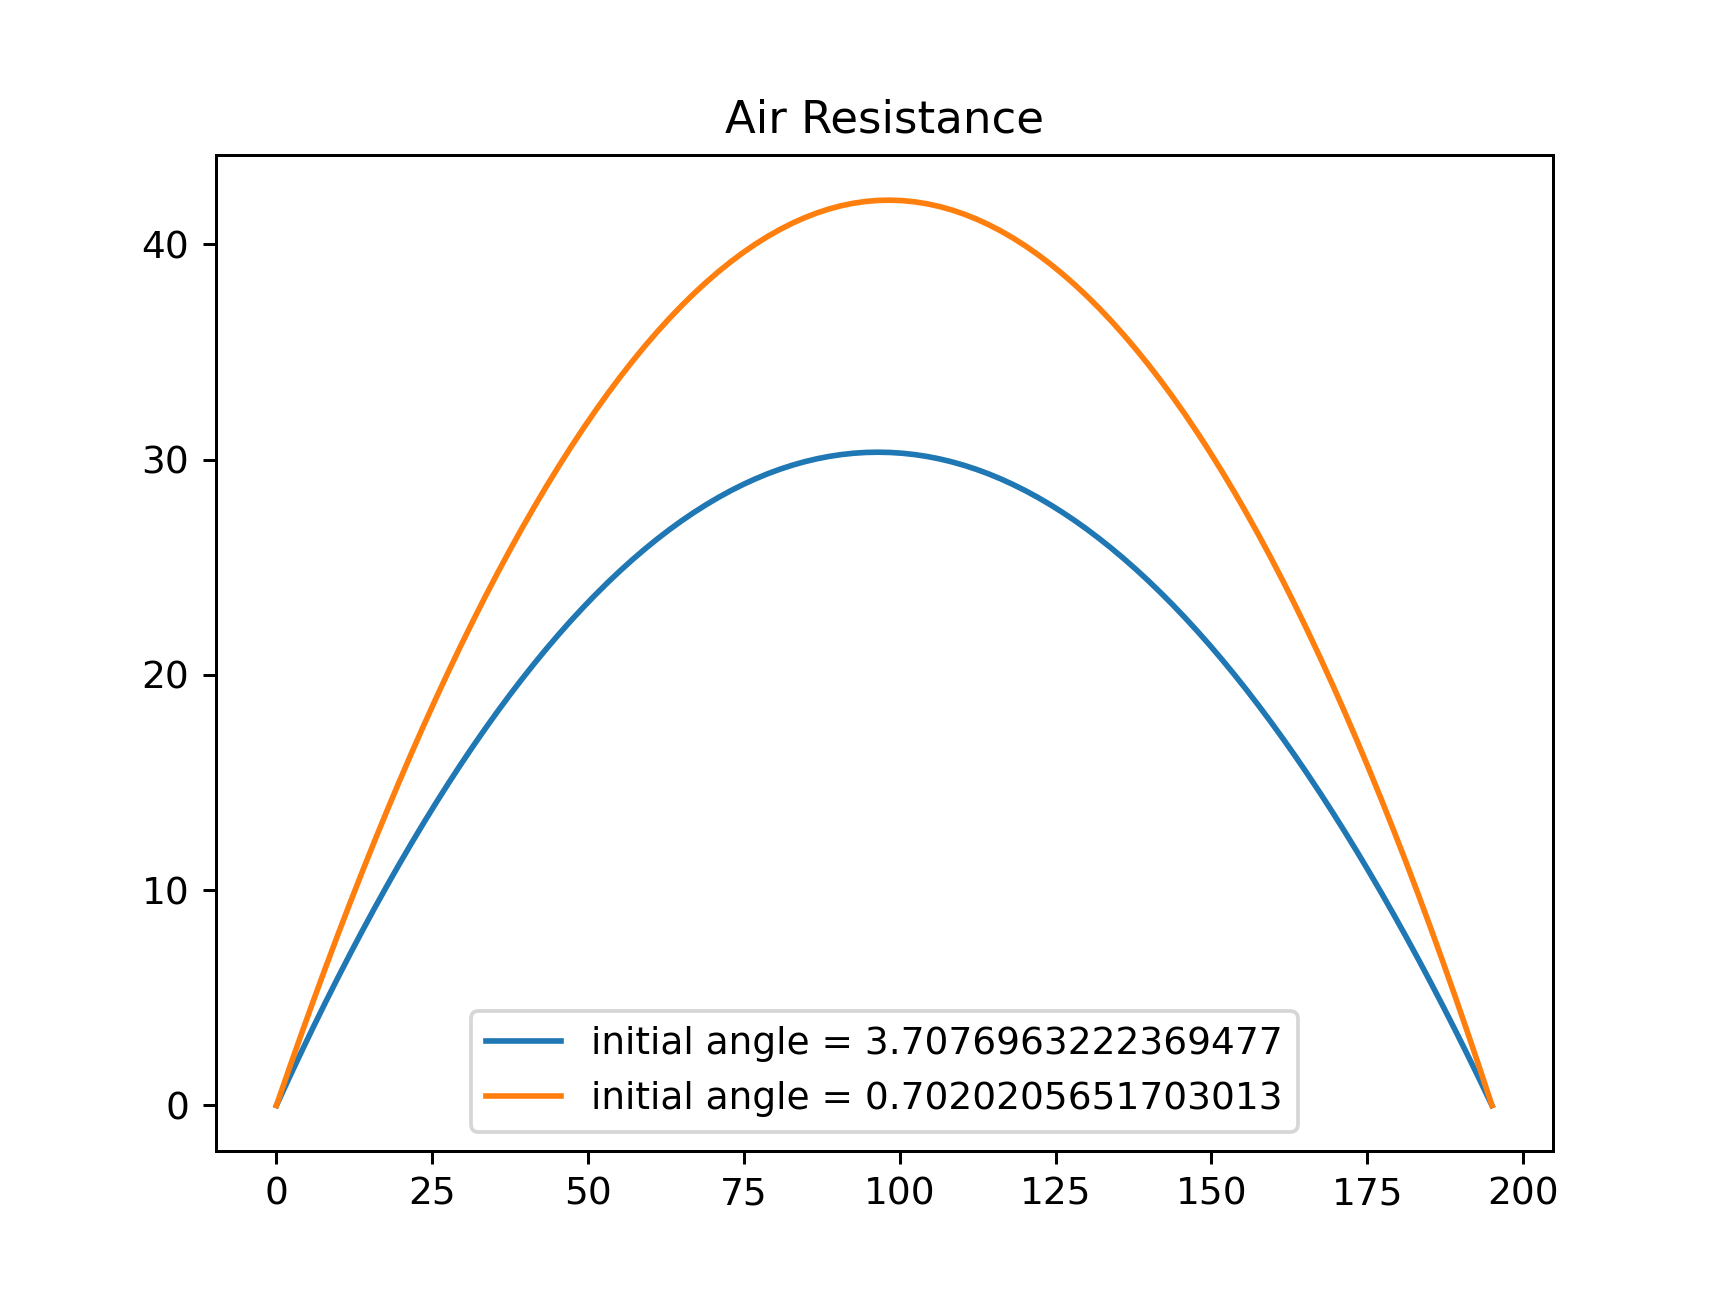

In [5]:
g = 9.8067
mus = [.0003,0.0]
m = 60
a,b = 0,195
alpha,beta = 0,0
v0 = 45

#set up the ode
def ode(x, y):
    return np.array([
        np.tan(y[2]),
        -(g*np.sin(y[2]) + mus[0]*y[1]**2)/(y[1]*np.cos(y[2])),
        -g/y[1]**2
    ])


def resid(t):
    sol = solve_ivp(ode,(a,b),[alpha,v0,t])
    yb = sol.y[0,-1]    
    return yb - beta

angles = [np.pi/3,np.pi/10] #angles

s = secant_method(resid, angles[0], -1)
s1 = secant_method(resid, angles[1], -1)

x = np.linspace(a,b,100) #solve
y = solve_ivp(ode, (a,b), (alpha, v0, s), t_eval=x).y[0]
y1 = solve_ivp(ode, (a,b), (alpha, v0, s1), t_eval=x).y[0]

plt.plot(x, y, label=f'initial angle = {s}')
plt.plot(x,y1, label=f'initial angle = {s1}')
plt.legend()
plt.title("Air Resistance")
plt.show()

<IPython.core.display.Javascript object>


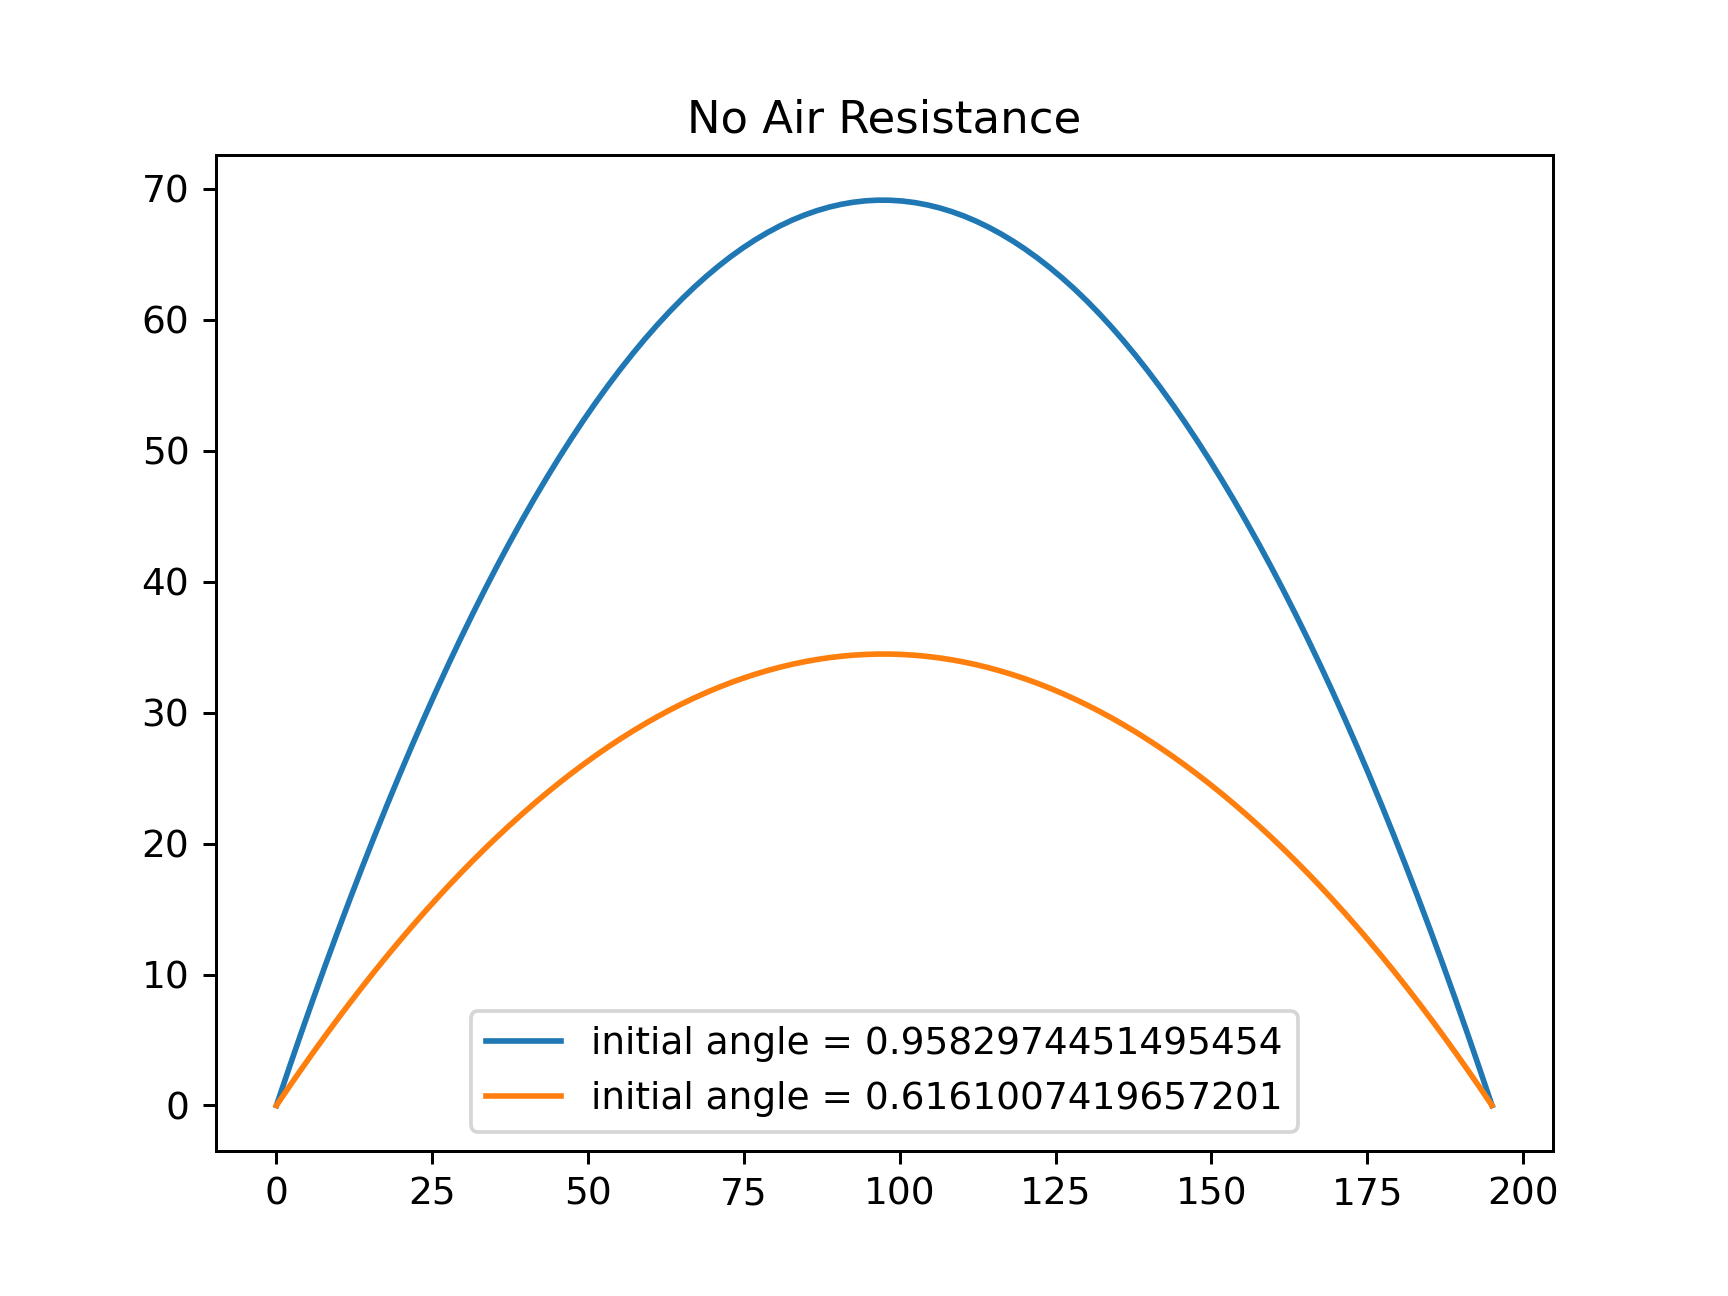

In [6]:
g = 9.8067
mus = [.0003,0.0]
m = 60
a,b = 0,195
alpha,beta = 0,0
v0 = 45
#initial values

#set up the ODE
def ode(x, y):
    return np.array([
        np.tan(y[2]),
        -(g*np.sin(y[2]) + mus[1]*y[1]**2)/(y[1]*np.cos(y[2])),
        -g/y[1]**2
    ])


def resid(t):
    sol = solve_ivp(ode,(a,b),[alpha,v0,t])
    yb = sol.y[0,-1]    
    return yb - beta

angles = [np.pi/3,np.pi/10] #angles

s = secant_method(resid, angles[0], -1)
s1 = secant_method(resid, angles[1], -1)

x = np.linspace(a,b,100) #solve
y = solve_ivp(ode, (a,b), (alpha, v0, s), t_eval=x).y[0]
y1 = solve_ivp(ode, (a,b), (alpha, v0, s1), t_eval=x).y[0]

plt.plot(x, y, label=f'initial angle = {s}')
plt.plot(x,y1, label=f'initial angle = {s1}')
plt.legend()
plt.title("No Air Resistance")
plt.show()